In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn.extent import GeoBoxBuilder
from mccn.loader import stac_load_raster

ENDPOINT = "http://203.101.230.81:8082/"
client = pystac_client.Client.open(ENDPOINT)
collection = client.get_collection("Raster")

In [2]:
gbox = GeoBoxBuilder.from_collection(collection, 100)
items = list(collection.get_all_items())
items

[<Item id=wyndham>, <Item id=tullamarine>, <Item id=sunbury>]

In [3]:
ds = stac_load_raster(items, gbox)
ds

<xarray.Dataset> Size: 42kB
Dimensions:      (y: 100, x: 100, time: 1)
Coordinates:
  * y            (y) float64 800B -37.54 -37.54 -37.55 ... -37.99 -37.99 -38.0
  * x            (x) float64 800B 144.4 144.5 144.5 144.5 ... 145.0 145.0 145.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2025-02-28T14:20:00
Data variables:
    price        (time, y, x) uint16 20kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    price_usd    (time, y, x) uint16 20kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

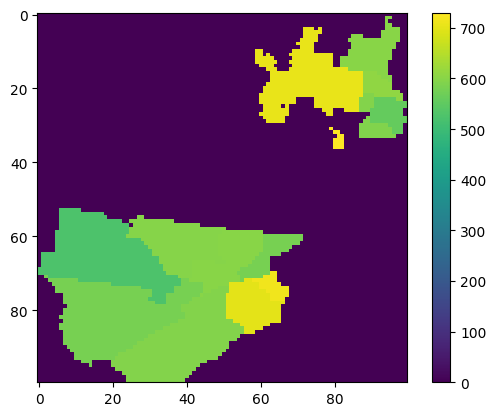

In [4]:
plt.imshow(ds.price.values[0, :, :])
plt.colorbar()
plt.show()

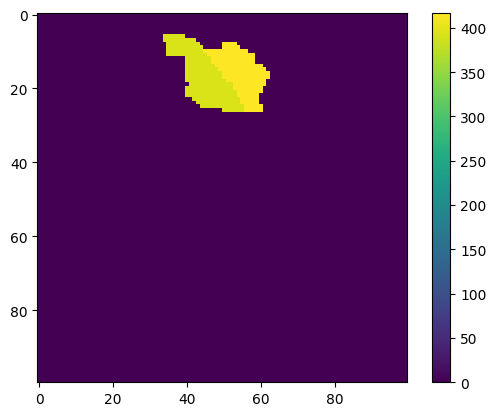

In [5]:
plt.imshow(ds.price_usd.values[0, :, :])
plt.colorbar()
plt.show()

### Load with alias

In [6]:
alias_ds = stac_load_raster(items, gbox, band_renaming={"price_usd": "priceUSD"})
alias_ds

<xarray.Dataset> Size: 42kB
Dimensions:      (y: 100, x: 100, time: 1)
Coordinates:
  * y            (y) float64 800B -37.54 -37.54 -37.55 ... -37.99 -37.99 -38.0
  * x            (x) float64 800B 144.4 144.5 144.5 144.5 ... 145.0 145.0 145.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2025-02-28T14:20:00
Data variables:
    price        (time, y, x) uint16 20kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    priceUSD     (time, y, x) uint16 20kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

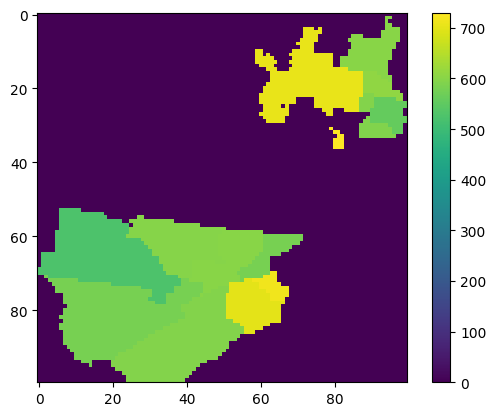

In [7]:
plt.imshow(alias_ds.price.values[0, :, :])
plt.colorbar()
plt.show()

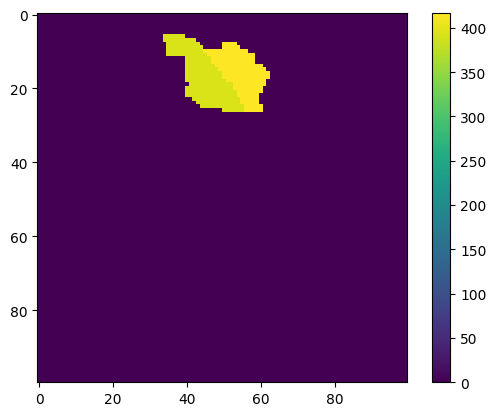

In [8]:
plt.imshow(alias_ds.priceUSD.values[0, :, :])
plt.colorbar()
plt.show()

#### With field processing

In [9]:
proc_ds = stac_load_raster(items, gbox, band_renaming={"price_usd": "price_aud"}, band_preprocessing={"price_usd": lambda x: x/0.67})
proc_ds

<xarray.Dataset> Size: 102kB
Dimensions:      (y: 100, x: 100, time: 1)
Coordinates:
  * y            (y) float64 800B -37.54 -37.54 -37.55 ... -37.99 -37.99 -38.0
  * x            (x) float64 800B 144.4 144.5 144.5 144.5 ... 145.0 145.0 145.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2025-02-28T14:20:00
Data variables:
    price        (time, y, x) uint16 20kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    price_aud    (time, y, x) float64 80kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

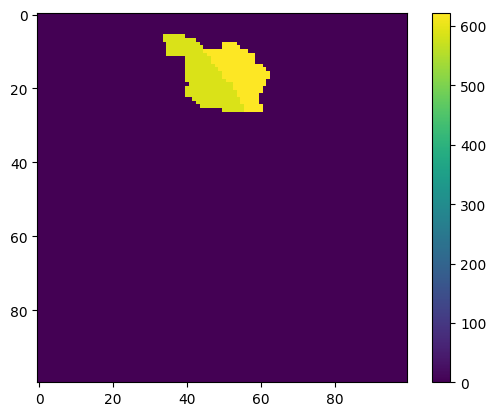

In [10]:
plt.imshow(proc_ds.price_aud.values[0, :, :])
plt.colorbar()
plt.show()